## 1. Import Required Libraries
Import libraries for data handling, modeling, and visualization.

In [44]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

## 2. Load and Explore Dataset
Load the migraine and weather dataset, and perform basic exploratory data analysis.

In [52]:
from prediction.data_processing import merge_migraine_and_weather_data, process_combined_data

# Merge and process data
merge_migraine_and_weather_data()
data = process_combined_data()

data.drop(columns=['Notes'], inplace=True, errors='ignore')  # Drop 'Notes' column if it exists

# Show sample rows and summary statistics
display(data.head())
display(data.describe())
display(data['Pain_Level_Binary'].value_counts())

,Date,Time,Pain Level,Medication,Dosage,Triggers,Location,Latitude_x,Longitude_x,Timezone,...,Physical Activity_0.0,Physical Activity_1.0,tdiff,tavg_lag1,tavg_lag2,humid.*tavg,pres_change_lag1,pres_change_lag2,Pain_Level_Log,Pain_Level_Binary
0,2023-01-01,0,0.0,NaN,NaN,NaN,"Carlsbad, California, USA",33.1581,-117.3506,America/Los_Angeles,...,False,False,2.8,NaN,NaN,1147.928,NaN,NaN,0.0,0
1,2023-01-02,0,0.0,NaN,NaN,NaN,"Carlsbad, California, USA",33.1581,-117.3506,America/Los_Angeles,...,False,False,7.2,14.2,NaN,878.712,NaN,NaN,0.0,0
2,2023-01-03,0,0.0,NaN,NaN,NaN,"Carlsbad, California, USA",33.1581,-117.3506,America/Los_Angeles,...,False,False,4.4,11.4,14.2,1116.160,6.4,NaN,0.0,0
3,2023-01-04,0,0.0,NaN,NaN,NaN,"Carlsbad, California, USA",33.1581,-117.3506,America/Los_Angeles,...,False,False,3.8,12.8,11.4,1364.220,2.5,6.4,0.0,0
4,2023-01-05,0,0.0,NaN,NaN,NaN,"Carlsbad, California, USA",33.1581,-117.3506,America/Los_Angeles,...,False,False,6.1,15.9,12.8,1192.464,1.0,2.5,0.0,0


,Date,Time,Pain Level,Latitude_x,Longitude_x,tavg,tmin,tmax,pres,prcp,...,Longitude_y,pres_change,tdiff,tavg_lag1,tavg_lag2,humid.*tavg,pres_change_lag1,pres_change_lag2,Pain_Level_Log,Pain_Level_Binary
count,854,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,...,854.000000,853.000000,854.000000,853.000000,852.000000,854.000000,852.000000,851.00000,854.000000,854.000000
mean,2024-02-02 16:36:32.037470720,182.578454,1.662763,33.158208,-117.349281,16.041979,10.968033,21.115925,1015.316862,1.135012,...,-117.349281,-0.000821,10.147892,16.048417,16.056103,1136.969361,-0.001878,-0.00188,0.637552,0.400468
min,2023-01-01 00:00:00,0.000000,0.000000,33.158100,-117.350600,7.800000,-0.600000,12.200000,1002.400000,0.000000,...,-117.350600,-8.500000,2.200000,7.800000,7.800000,406.260000,-8.500000,-8.50000,0.000000,0.000000
25%,2023-07-24 06:00:00,0.000000,0.000000,33.158100,-117.350600,12.800000,6.700000,17.800000,1012.800000,0.000000,...,-117.350600,-1.300000,6.700000,12.800000,12.800000,765.700000,-1.300000,-1.30000,0.000000,0.000000
50%,2024-02-05 12:00:00,0.000000,0.000000,33.158100,-117.350600,15.550000,10.600000,21.100000,1015.050000,0.000000,...,-117.350600,0.000000,9.500000,15.550000,15.550000,1143.121000,0.000000,0.00000,0.000000,0.000000
75%,2024-08-18 18:00:00,0.000000,4.000000,33.158100,-117.350600,19.150000,15.975000,24.400000,1017.600000,0.000000,...,-117.350600,1.000000,13.000000,19.150000,19.150000,1509.830500,1.000000,1.00000,1.609438,1.000000
max,2025-01-18 00:00:00,1394.000000,8.000000,33.160200,-117.325000,28.100000,22.200000,35.600000,1025.600000,58.800000,...,-117.325000,12.500000,25.600000,28.100000,28.100000,1931.540000,12.500000,12.50000,2.197225,1.000000
std,NaN,368.299467,2.250407,0.000464,0.005662,4.052397,5.316282,3.838770,3.599052,5.104721,...,0.005662,2.299563,4.506701,4.050401,4.046552,418.725123,2.300707,2.30206,0.806115,0.490280


Pain_Level_Binary
0    512
1    342
Name: count, dtype: int64

## 3. Preprocess Data
Handle missing values, select features and target, and split the data into training and testing sets.

In [53]:
# Drop columns with any NaN values
data_clean = data.dropna(axis=1)

# Select features and target for binary classification
features = data_clean.drop(columns=[
    'Date', 'date', 'Medication', 'Dosage', 'Triggers', 'Notes', 'Location', 'Timezone',
    'Pain Level', 'Pain_Level_Binary', 'Pain_Level_Log',
    'Longitude', 'Latitude', 'Time',
    'Latitude_x', 'Longitude_x', 'Latitude_y', 'Longitude_y',
], errors='ignore')
target = data_clean['Pain_Level_Binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train Base Models
Train several base models (logistic regression, decision tree, k-nearest neighbors) on the training data.

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Apply SMOTE to training data for base models
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Train base models
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
svc = SVC(probability=True, class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)

lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)
svc.fit(X_train_res, y_train_res)
xgb.fit(X_train_res, y_train_res)
mlp.fit(X_train_res, y_train_res)
hgb.fit(X_train_res, y_train_res)

/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


## 5. Create and Train Ensemble Model
Combine base models using stacking and train the ensemble model.

In [48]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# Define base models with class balancing where possible
base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)),
    ('hgb', HistGradientBoostingClassifier(random_state=42))
]

# Use SMOTE in a pipeline for stacking
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    cv=3,
    n_jobs=-1
)

# Pipeline: SMOTE + Stacking
ensemble_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('stack', stack)
])
ensemble_pipeline.fit(X_train_scaled, y_train)

/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: M

/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Aresh/Desktop/Projects/Migraine Navigator/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: M

,steps,"[('smote', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,estimators,"[('rf', ...), ('lr', ...), ...]"
,final_estimator,RandomForestC...ndom_state=42)
,cv,3
,stack_method,'auto'


## 6. Evaluate Ensemble Model
Evaluate the stacking ensemble model on the test set using accuracy, F1, and confusion matrix.

Stacking Ensemble (SMOTE) Accuracy: 0.68
Stacking Ensemble (SMOTE) F1 Score: 0.60
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        88
           1       0.75      0.51      0.60        83

    accuracy                           0.68       171
   macro avg       0.70      0.67      0.67       171
weighted avg       0.70      0.68      0.67       171



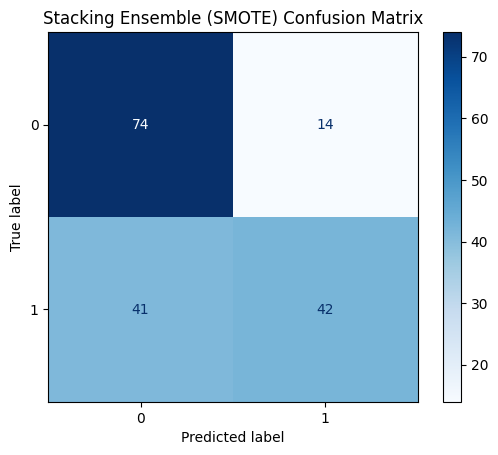

In [49]:
# Evaluate ensemble model (with SMOTE and more diverse base models)
y_pred_stack = ensemble_pipeline.predict(X_test_scaled)
acc_stack = accuracy_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
print(f"Stacking Ensemble (SMOTE) Accuracy: {acc_stack:.2f}")
print(f"Stacking Ensemble (SMOTE) F1 Score: {f1_stack:.2f}")
print(classification_report(y_test, y_pred_stack))
cm_stack = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stack)
disp.plot(cmap='Blues')
plt.title("Stacking Ensemble (SMOTE) Confusion Matrix")
plt.show()

## 7. Compare Ensemble with Base Models
Compare the performance of the stacking ensemble with the individual base models using metrics and visualizations.

,Model,Accuracy,F1 Score
0,Logistic Regression,0.567251,0.554217
1,Random Forest,0.649123,0.571429
2,SVC,0.596491,0.576687
3,XGBoost,0.619883,0.580645
4,MLPClassifier,0.684211,0.653846
5,HistGradientBoosting,0.608187,0.524823
6,Stacking Ensemble,0.678363,0.604317


,Model,Accuracy,F1 Score
0,Logistic Regression,0.567251,0.554217
1,Random Forest,0.649123,0.571429
2,SVC,0.596491,0.576687
3,XGBoost,0.619883,0.580645
4,MLPClassifier,0.684211,0.653846
5,HistGradientBoosting,0.608187,0.524823
6,Stacking Ensemble,0.678363,0.604317


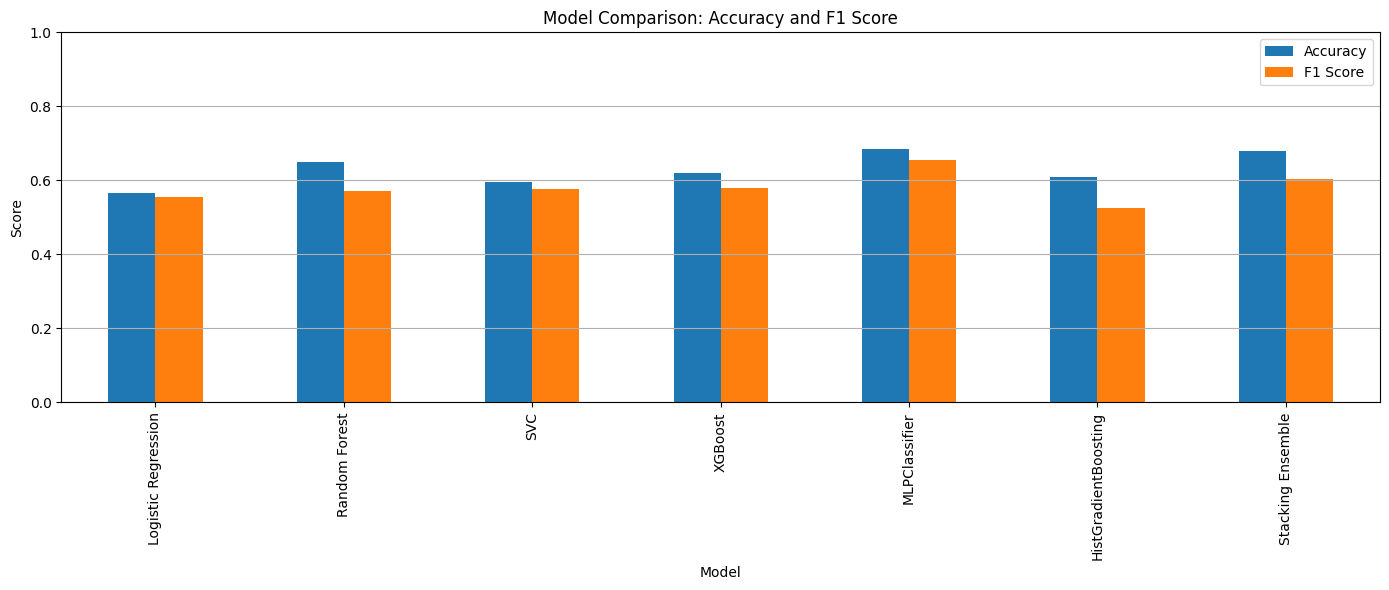

In [50]:
# Compare ensemble with base models (excluding GaussianNB)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_hgb = hgb.predict(X_test_scaled)
y_pred_stack = ensemble_pipeline.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
acc_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
acc_hgb = accuracy_score(y_test, y_pred_hgb)
f1_hgb = f1_score(y_test, y_pred_hgb)
acc_stack = accuracy_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'SVC',
        'XGBoost',
        'MLPClassifier',
        'HistGradientBoosting',
        'Stacking Ensemble'
    ],
    'Accuracy': [acc_lr, acc_rf, acc_svc, acc_xgb, acc_mlp, acc_hgb, acc_stack],
    'F1 Score': [f1_lr, f1_rf, f1_svc, f1_xgb, f1_mlp, f1_hgb, f1_stack]
})
display(results)

results.set_index('Model')[['Accuracy', 'F1 Score']].plot(kind='bar', figsize=(14,6))
plt.title('Model Comparison: Accuracy and F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()